# Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.



## Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

<center><img src='images/temp_avg.png' height="400px"/></center>


## Optional Recommended Analysis

* The following are optional challenge queries. These are highly recommended to attempt, but not required for the homework.

  * Calcualte the rainfall per weather station using the previous year's matching dates.

* Calculate the daily normals. Normals are the averages for min, avg, and max temperatures.

  * Create a function called `daily_normals` that will calculate the daily normals for a specific date. This date string will be in the format `%m-%d`. Be sure to use all historic tobs that match that date string.

  * Create a list of dates for your trip in the format `%m-%d`. Use the `daily_normals` function to calculate the normals for each date string and append the results to a list.

  * Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.

  * Use Pandas to plot an area plot (`stacked=False`) for the daily normals.

  <center><img src="images/daily_normals.png" /></center>


In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import create_engine, inspect, func
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
import time
import os
import matplotlib
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
session = Session(engine)

In [4]:
# Reflect data by using declarative_base and check it
Base = automap_base()
Base.prepare(engine, reflect= True)
Base.classes.keys()

['measurements', 'stations']

In [5]:
# Explore database
engine.execute('SELECT * FROM measurements LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61)]

In [6]:
# Load the tables from the engine
Measurements = Base.classes.measurements
    
Stations = Base.classes.stations

## Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

<center><img src='images/precip.png' /></center>

* Use Pandas to print the summary statistics for the precipitation data.

In [7]:
# Retrieve the last 12 months of precipitation data.
start_date = dt.datetime(2016,8,24)
end_date = dt.datetime(2017,8,23)

In [8]:
year_prcp = session.query(Measurements.date, Measurements.prcp).\
           filter(Measurements.date >= start_date).\
           filter(Measurements.date <= end_date).all()

# result = session.query(Measurements).\
#         filter_by(date >= start_date).\
#         filter_by(date <= end_date).all()

In [9]:
# Create a dataframe by pandas 
df= pd.DataFrame(year_prcp, columns = ["Date", "Prcp"])
df["Date"]=pd.to_datetime(df["Date"])

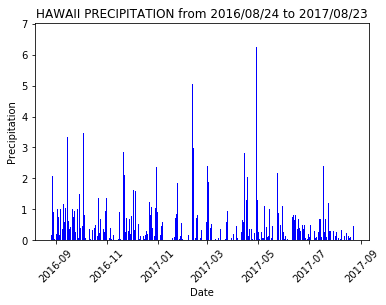

In [10]:
# Plotting with y-axis, Prcp, and x-axis, Date 

fig, ax = plt.subplots()
ax.bar(df["Date"],df["Prcp"] , color="b")
ax.set_xlabel("Date")
ax.set_ylabel("Precipitation")
ax.set_title("HAWAII PRECIPITATION from 2016/08/24 to 2017/08/23")
plt.xticks(rotation=45)
# fig.tight_layout()
plt.show()


# Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  <center><img src='images/temp_hist.png' height="400px" /></center>


In [11]:
# Query to retrieve total number of stations
session.query(func.count(Stations.station)).first()


(18)

In [12]:
# Query to retrieve the most active stations
sel = [Stations.station, func.count(Measurements.tobs)]
observations = session.query(*sel).filter(Stations.station == Measurements.station ).\
                group_by(Stations.station).\
                order_by(func.count(Measurements.tobs).desc()).limit(1).all()

In [14]:
# print the results
for observation in observations:
    print(observation)

print(f"The most active station is {observations[0][0]} with {observations[0][1]} observations.")

('USC00519281', 11088)
The most active station is USC00519281 with 11088 observations.


In [15]:
# Retrieve the last 12 months of temperature observation data (tobs)
start_date = dt.datetime(2016,8,24)
end_date = dt.datetime(2017,8,23)

In [16]:
# Retrieve the last 12 months of temperature observation data (tobs)

sel2 = [Stations.station, Measurements.tobs]
observations_1yr= session.query(*sel2).filter(Stations.station == Measurements.station ).\
                filter(Measurements.station=="USC00519281" ).\
                filter(Measurements.date > start_date ).\
                filter(Measurements.date < end_date ).all()
observations_1yr

[('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 75),
 ('USC00519281', 75),
 ('USC00519281', 73),
 ('USC00519281', 73),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 77),
 ('USC00519281', 77),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 78),
 ('USC00519281', 73),
 ('USC00519281', 73),
 ('USC00519281', 74),
 ('USC00519281', 74),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 77),
 ('USC00519281', 77),
 ('USC00519281', 80),
 ('USC00519281', 80),
 ('USC00519281', 76),
 ('USC00519281', 76),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 75),
 ('USC00519281', 75),
 ('USC00519281', 79),
 ('USC00519281', 79),
 ('USC00519281', 78),
 ('USC0051

In [22]:
# Create a dataframe by pandas     
observations_1yr_df = pd.DataFrame(observations_1yr, columns = ['station', 'tobs'])
observations_1yr_df.head()

,station,tobs
0,USC00519281,80
1,USC00519281,80
2,USC00519281,80
3,USC00519281,80
4,USC00519281,75


In [23]:
observations_1yr_df=observations_1yr_df.drop(["station"], axis=1) 

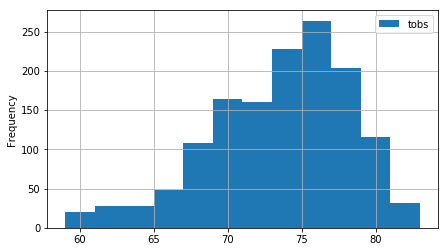

In [28]:
# Plot the results as a histogram with bins=12.
observations_1yr_df.plot.hist(bins=12, figsize=(7,4))
# plt.hist(observations_1yr_df, bins=12)
plt.grid()
plt.show()